# 为什么用numpy
* c语言编写  
* * Numpy数组内的数据类型统一，连续存储在内存中  
* 多线程执行,python有线程锁

In [3]:
import numpy as np

In [6]:
#  单位矩阵
np.eye(3) ## 单位长度

array([ 1,  3,  5,  7,  9, 11, 13])

In [8]:
# 线性矩阵 初始1， 结束15， 步长 2 [1, 15)
np.arange(1,15,2)

array([ 1,  3,  5,  7,  9, 11, 13])

In [12]:
# 创建3*5的数组 全部为3.3
np.full((3,5), 3.3)

array([[3.3, 3.3, 3.3, 3.3, 3.3],
       [3.3, 3.3, 3.3, 3.3, 3.3],
       [3.3, 3.3, 3.3, 3.3, 3.3]])

In [19]:
# 等差数列a (start, end, num)
# np.linspace(1, 5, 5, dtype='int')
np.linspace(1, 3, 5)

array([1. , 1.5, 2. , 2.5, 3. ])

In [21]:
# 等比数列 10 的0~9次方
np.logspace(0,9, 10)

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07,
       1.e+08, 1.e+09])

In [37]:
# 均匀分布0~1随机数列 size=形状
np.random.random(5)
# np.random.random((2,4))

array([[0.27328166, 0.58014351, 0.95809228, 0.32627595],
       [0.24883913, 0.4584138 , 0.33037719, 0.73772198]])

In [39]:
# 高斯分布/正态分布
# np.random.normal(loc, scale, size)
# loc(float): 正态分布的均值， 对应这个分布的中心值  loc = 0 表示这是一个以y轴为对称轴的正态分布
# scale(float):正态分布的标准差，对应分布的宽度，scale越大，正态分布的曲线越矮胖，scale越小，曲线越高瘦
# size(Union[int, iterable, tuple[int], None]) = None 输出赋值形状
np.random.normal(0, 2, 7)

array([-2.13446086,  1.29358103, -1.74617456,  2.66732671, -1.30831696,
       -2.2849475 ,  0.91973253])

In [41]:
# 随机整数
# 最大 最小值 shape
np.random.randint(1,10,(3,3))

array([[3, 6, 5],
       [5, 8, 6],
       [9, 2, 9]])

In [52]:
# 随机重排列
x = np.array([10, 20, 30, 40])
print(x, id(x))
x1 = np.random.permutation(x) # 生成新子序列
print(x1, id(x1))
np.random.shuffle(x) # 修改原序列
print(x, id(x))

[10 20 30 40] 2661729564032
[10 30 40 20] 2661710444304
[10 20 40 30] 2661729564032


In [56]:
# 随机采样
x = np.arange(1, 25, dtype = int)
print(x)
tmp = np.random.choice(x, size=(4,3)) # 在内容采样
print(tmp)
tmp = np.random.choice(x, size=(4,3), p = x/np.sum(x)) # 按概率采样
print(tmp)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
[[24 15  7]
 [16  2 15]
 [ 9  9 15]
 [22 15 17]]
[[20 13 15]
 [24 20 24]
 [12 22 19]
 [21 17 21]]


# numpy内部性质
* shape=形状  
* dnim=维度[dimension]
* dtype=数组类型 

In [67]:
# 数组的变形
x5 = np.random.randint(1,10, (12,))
print(x5, x5.shape, id(x5))

[4 9 9 1 2 5 7 4 1 6 5 6] (12,) 2661722745152


In [71]:
# reshape改变形状，返回视图
x6 = np.reshape(x5, (3,4))
print(x6, x6.shape, id(x6))
print(x5, x5.shape, id(x5))
x6[0,0] = 0 #%% 仍然会修改原数组
print(x6, x6.shape, id(x6))
print(x5, x5.shape, id(x5))

[[0 9 9 1]
 [2 5 7 4]
 [1 6 5 6]] (3, 4) 2661731586416
[0 9 9 1 2 5 7 4 1 6 5 6] (12,) 2661722745152
[[0 9 9 1]
 [2 5 7 4]
 [1 6 5 6]] (3, 4) 2661731586416
[0 9 9 1 2 5 7 4 1 6 5 6] (12,) 2661722745152


In [80]:
print(np.newaxis)
# 一维数据转行向量
x6 = x5.reshape(1,x5.shape[0])
print(x5, x5.shape[0])
x6

None
[0 9 9 1 2 5 7 4 1 6 5 6] 12


array([[0, 9, 9, 1, 2, 5, 7, 4, 1, 6, 5, 6]])

In [90]:
#或者使用np.newaxis
x7 = x5[np.newaxis, :]
x7

array([[0, 9, 9, 1, 2, 5, 7, 4, 1, 6, 5, 6]])

In [98]:
#多维转一维
x8 = np.random.randint(1,10, (3,4))

# flatten  返回副本/修改不影响原有
x9 = x8.flatten()
print(x9)
x9[0] = 0
print(x8)
print(x9)
# ravel 返回视图
x10 = x8.ravel()
x10[0] = 0
print(x8)
print(x10)
# reshape 返回视图
x11 = x8.reshape(-1) # -1强行转1维数
x11[0] = 11
print(x8)
print(x11)

[7 9 8 6 7 7 5 8 1 9 5 8]
[[7 9 8 6]
 [7 7 5 8]
 [1 9 5 8]]
[0 9 8 6 7 7 5 8 1 9 5 8]
[[0 9 8 6]
 [7 7 5 8]
 [1 9 5 8]]
[0 9 8 6 7 7 5 8 1 9 5 8]
[[11  9  8  6]
 [ 7  7  5  8]
 [ 1  9  5  8]]
[11  9  8  6  7  7  5  8  1  9  5  8]


In [106]:
#np 的拼接 
# 水平拼接
x12 = np.random.randint(1, 10, (3,4))
x13 = np.random.randint(1, 10, (3,4))

# 返回都是视图
a1 = np.hstack([x12, x13])
print(a1)
a1[0][0] = 0
print(x12)
a2 = np.c_[x12, x13]
a2[0][0] = 0
print(a2)
print(x12)

[[8 7 9 6 8 3 6 8]
 [4 9 1 5 1 5 8 4]
 [5 6 2 6 2 7 2 3]]
[[8 7 9 6]
 [4 9 1 5]
 [5 6 2 6]]
[[0 7 9 6 8 3 6 8]
 [4 9 1 5 1 5 8 4]
 [5 6 2 6 2 7 2 3]]
[[8 7 9 6]
 [4 9 1 5]
 [5 6 2 6]]


In [118]:
# 错误测试
x12_tmp = x12.reshape((2, x12.size // 2))
a1 = np.hstack([x12_tmp, x13])
a1
# ValueError: all the input array dimensions except for the concatenation axis must match exactly
# ValueError:除连接轴外的所有输入数组维度必须完全匹配
# 维度不匹配

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [ ]:
# 垂直拼接
x14 = np.random.randint(1, 10, (3,4))
x15 = np.random.randint(1, 10, (3,4))

a1 = np.vstack([x14, x15])
print(a1)
a1[0][0] = 0
print(x14)
a2 = np.r_[x14, x15]
a2[0][0] = 0
print(a2)
print(x14)

In [135]:
# 分割数值
# 水平分割
x16 = np.arange(0, 10)
print(x16)
# 把数据分3段，split参数为中间分割点 
a1,a2,a3 = np.split(x16, [2,5])
print(a1,a2,a3)
# 垂直分割 hsplit

[0 1 2 3 4 5 6 7 8 9]
[0 1] [2 3 4] [5 6 7 8 9]


In [142]:
# 多维分割测试
x17 = np.random.randint(1, 10, (3,4))
print("x17", x17)
a1,a2,a3 = np.split(x17, [1,3]) # 截取行
print("a1:", a1, "a2:", a2, "a3:", a3)
a1,a2,a3 = np.split(x17, [[1,3],1]) # 截取行
print("a1:", a1, "a2:", a2, "a3:", a3)

x17 [[4 7 6 8]
 [1 5 6 4]
 [3 8 3 5]]
a1: [[4 7 6 8]] a2: [[1 5 6 4]
 [3 8 3 5]] a3: []


TypeError: slice indices must be integers or None or have an __index__ method

In [144]:
# 四则运算可直接使用，对整个矩阵生效
x18 = np.random.randint(1, 10, (3,4)) 
print(x18)
x18 += 1
print(x18)

[[2 5 5 9]
 [2 3 1 6]
 [3 6 9 9]]
[[ 3  6  6 10]
 [ 3  4  2  7]
 [ 4  7 10 10]]


In [ ]:
# 常用的函数
# 绝对值 abs() np.abs()

In [148]:
# 三角函数 np.sin() np.cos() np.tan()
# 反三角函数 np.arcsin() np.arccos np.arctan()
theta = np.linspace(0, np.pi, 3) # 等比数列
# theta
print("sin(Theta)",np.sin(theta))
print("cos(Theta)",np.cos(theta))
print("tan(Theta)",np.tan(theta))

sin(Theta) [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(Theta) [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(Theta) [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [155]:
# 指数运算 exp
x = np.arange(3)
print(x)
x_tmp = np.exp(x)

[0 1 2]


array([1.        , 2.71828183, 7.3890561 ])

In [158]:
# 对数运算
x = np.array([1,2,4])
print(x)
np.log(x) # 1为底数
np.log2(x) # 2为底数
np.log10(x) # 10为底数

[1 2 4]


array([0.        , 0.69314718, 1.38629436])

In [171]:
# 矩阵转置
x = np.random.randint(1, 10, (3,3))
print(x)
y = x.T # 转置标记 x 轴与 y轴置换
print(y)

# 矩阵乘法
tmp = np.dot(x,y)  
print(tmp)
# 两种乘法不一样
tmp = x*y
print(tmp)

[[9 9 2]
 [2 8 5]
 [6 6 1]]
[[9 2 6]
 [9 8 6]
 [2 5 1]]
[[166 100 110]
 [100  93  65]
 [110  65  73]]
[[81 18 12]
 [18 64 30]
 [12 30  1]]


In [ ]:
# 如果两个数组的形状不匹配
# 那么数组的形式会沿着维度为1进行扩展以匹配另一个数组的形状

In [173]:
# 比较运算
x = np.random.randint(1,100, (5,5))
print(x)
tmp = x > 50
print(tmp)

[[33 83  5 94 97]
 [52  1 69 92 89]
 [98 73  4 91 28]
 [50 59 37 86 90]
 [45 46 34 92 25]]
[[False  True False  True  True]
 [ True False  True  True  True]
 [ True  True False  True False]
 [False  True False  True  True]
 [False False False  True False]]


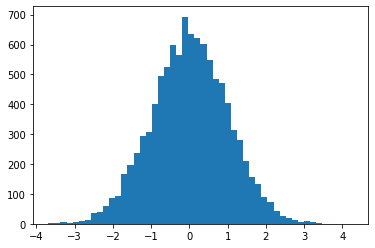

In [175]:
x = np.random.normal(0,1, size=10000)
import matplotlib.pyplot as plt
plt.hist(x, bins = 50)
plt.show()

In [ ]:
# 中位数
